In [ ]:
!pip install pycaret

In [ ]:
!pip install markupsafe==2.0.1

In [1]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
test = pd.read_csv('./drive/MyDrive/LG_Aimer/test.csv')
meta_x_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)

In [4]:
df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')

In [5]:
df1 = df.copy()
df1=df[(df['Y_01']>=0.2)&(df['Y_01']<2.0)&(df['Y_02']>=0.2)
&(df['Y_02']<=2.1)&(df['Y_02']>=0.2)
&(df['Y_03']>=0.2)&(df['Y_03']<=2.1)
&(df['Y_04']<=19)&(df['Y_04']>=7)&(df['Y_05']<=36.5)&(df['Y_05']>=22)
&(df['Y_06']>=-19.2)&(df['Y_06']<=19)&(df['Y_07']>=2.4)&(df['Y_07']<=4)
&(df['Y_08']>=-29.2)&(df['Y_08']<=-24)&(df['Y_09']>=-29.2)&(df['Y_09']<=-24)
&(df['Y_10']>=-30.6)&(df['Y_10']<=-20)&(df['Y_11']>=19.6)&(df['Y_11']<=26.6)
&(df['Y_12']>=-29.2)&(df['Y_12']<=-24)&(df['Y_13']>=-29.2)&(df['Y_13']<=-24)
&(df['Y_14']>=-29.2)&(df['Y_14']<=-24)]
len(df1.index)

35687

In [6]:
for idx in range(0,39607):
    if idx in df1.index:
        df.loc[idx,'pass']=1
    else:
        df.loc[idx,'pass']=0
df['pass'].value_counts()

1.0    35687
0.0     3920
Name: pass, dtype: int64

In [7]:
drop_sensors = ['ID','X_04', 'X_23', 'X_47', 'X_48','Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09',
       'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14']
df= df.drop(labels = drop_sensors,axis=1, inplace=False)

In [8]:
clf = setup(data=df, target='pass', train_size=0.8, session_id=42,numeric_features=['X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19',
       'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29',
       'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38',
       'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_49',
       'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56'])

,Description,Value
0,session_id,42
1,Target,pass
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(39607, 53)"
5,Missing Values,False
6,Numeric Features,52
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9009,0.5194,1.0000,0.9009,0.9479,0.0000,0.0000,0.500
ridge,Ridge Classifier,0.9009,0.0000,1.0000,0.9009,0.9479,0.0000,0.0000,0.050
rf,Random Forest Classifier,0.9009,0.5343,1.0000,0.9009,0.9479,0.0000,0.0000,12.001
et,Extra Trees Classifier,0.9009,0.5376,1.0000,0.9009,0.9479,0.0000,0.0000,3.740
dummy,Dummy Classifier,0.9009,0.5000,1.0000,0.9009,0.9479,0.0000,0.0000,0.031
ada,Ada Boost Classifier,0.9008,0.5561,0.9999,0.9009,0.9478,-0.0002,-0.0018,3.001
lda,Linear Discriminant Analysis,0.9008,0.5575,0.9999,0.9009,0.9478,-0.0001,-0.0008,0.272
lightgbm,Light Gradient Boosting Machine,0.9008,0.5512,0.9998,0.9009,0.9478,0.0008,0.0035,0.754
gbc,Gradient Boosting Classifier,0.9006,0.5667,0.9997,0.9009,0.9477,-0.0006,-0.0034,15.357
knn,K Neighbors Classifier,0.8941,0.5105,0.9913,0.9010,0.9440,0.0020,0.0034,0.499


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr = create_model('lr',fold=10)

In [ ]:
tuned_lr = tune_model(lr, fold=10, optimize='Accuracy')

In [ ]:
ridge = create_model('ridge',fold=10)

In [ ]:
tuned_ridge = tune_model(ridge, fold=10, optimize='Accuracy')

In [16]:
rf = create_model('rf',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.5628,1.0,0.9009,0.9479,0.0,0.0
1,0.9009,0.5328,1.0,0.9009,0.9479,0.0,0.0
2,0.9009,0.5356,1.0,0.9009,0.9479,0.0,0.0
3,0.9009,0.5432,1.0,0.9009,0.9479,0.0,0.0
4,0.9009,0.5252,1.0,0.9009,0.9479,0.0,0.0
5,0.9009,0.5241,1.0,0.9009,0.9479,0.0,0.0
6,0.9009,0.5162,1.0,0.9009,0.9479,0.0,0.0
7,0.9009,0.5348,1.0,0.9009,0.9479,0.0,0.0
8,0.9009,0.5191,1.0,0.9009,0.9479,0.0,0.0


In [17]:
tuned_rf = tune_model(rf, fold=10, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.5707,1.0,0.9009,0.9479,0.0,0.0
1,0.9009,0.5564,1.0,0.9009,0.9479,0.0,0.0
2,0.9009,0.5792,1.0,0.9009,0.9479,0.0,0.0
3,0.9009,0.5738,1.0,0.9009,0.9479,0.0,0.0
4,0.9009,0.5687,1.0,0.9009,0.9479,0.0,0.0
5,0.9009,0.5367,1.0,0.9009,0.9479,0.0,0.0
6,0.9009,0.5612,1.0,0.9009,0.9479,0.0,0.0
7,0.9009,0.5816,1.0,0.9009,0.9479,0.0,0.0
8,0.9009,0.5702,1.0,0.9009,0.9479,0.0,0.0


In [ ]:
et = create_model('et', fold=10)

In [20]:
tuned_et = tune_model(et, fold=10,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.5527,1.0,0.9009,0.9479,0.0,0.0
1,0.9009,0.5508,1.0,0.9009,0.9479,0.0,0.0
2,0.9009,0.5799,1.0,0.9009,0.9479,0.0,0.0
3,0.9009,0.5870,1.0,0.9009,0.9479,0.0,0.0
4,0.9009,0.5473,1.0,0.9009,0.9479,0.0,0.0
5,0.9009,0.5352,1.0,0.9009,0.9479,0.0,0.0
6,0.9009,0.5560,1.0,0.9009,0.9479,0.0,0.0
7,0.9009,0.5773,1.0,0.9009,0.9479,0.0,0.0
8,0.9009,0.5630,1.0,0.9009,0.9479,0.0,0.0


In [25]:
dummy = create_model('dummy',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
1,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
2,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
3,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
4,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
5,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
6,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
7,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0
8,0.9009,0.5,1.0,0.9009,0.9479,0.0,0.0


In [ ]:
tuned_dummy = tune_model(dummy, fold=10,optimize='Accuracy')

In [28]:
blended = blend_models(estimator_list =[tuned_lr,tuned_rf,tuned_et ],fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.5563,1.0,0.9009,0.9479,0.0,0.0
1,0.9009,0.5688,1.0,0.9009,0.9479,0.0,0.0
2,0.9009,0.5436,1.0,0.9009,0.9479,0.0,0.0
3,0.9009,0.5724,1.0,0.9009,0.9479,0.0,0.0
4,0.9009,0.5632,1.0,0.9009,0.9479,0.0,0.0
Mean,0.9009,0.5609,1.0,0.9009,0.9479,0.0,0.0
Std,0.0000,0.0102,0.0,0.0000,0.0000,0.0,0.0


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5.682, class_weight={},
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
  

In [30]:
pred = predict_model(blended)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5.682, class_weight={},
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                             

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9015,0.5701,1.0,0.9015,0.9482,0.0,0.0


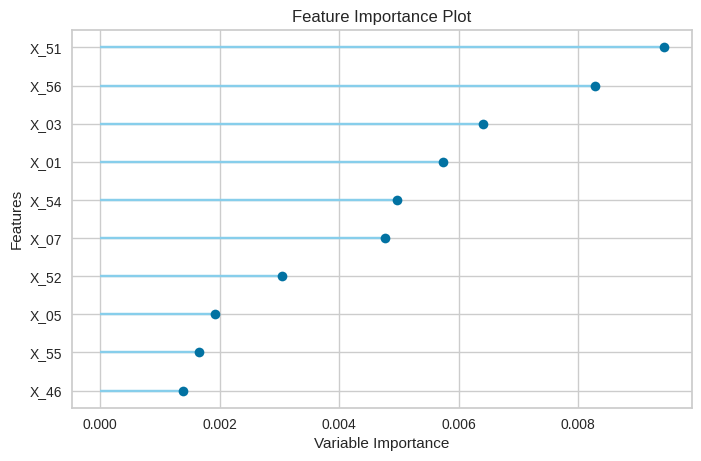

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(tuned_lr,'feature')

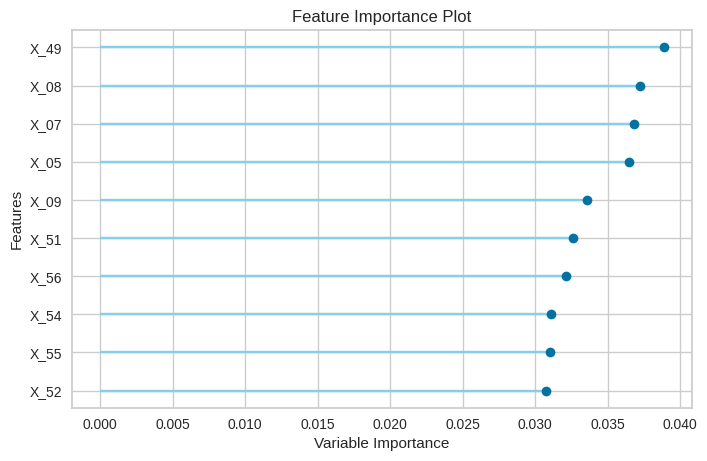

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(tuned_rf,'feature')

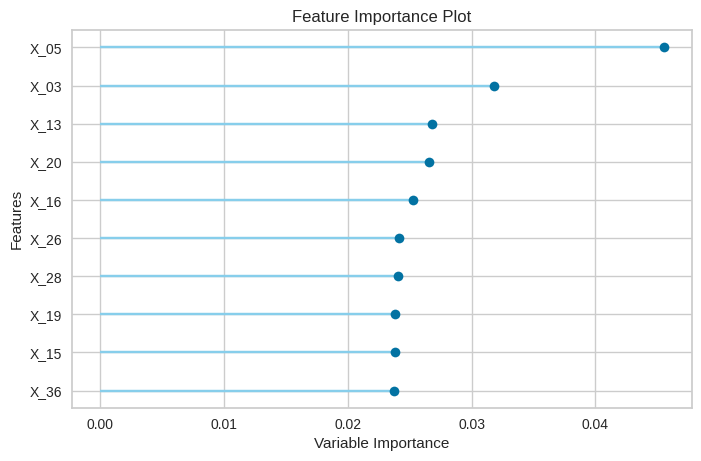

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(tuned_et,'feature')

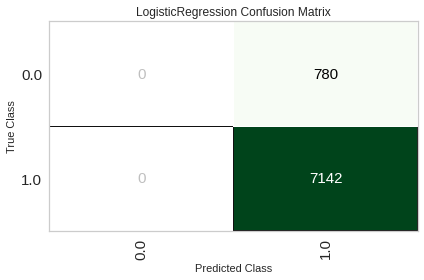

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_lr, 'confusion_matrix')

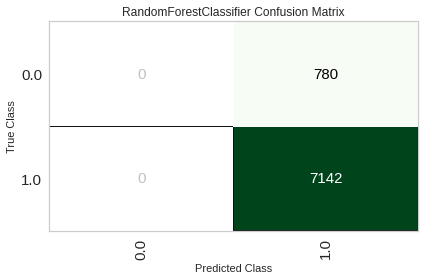

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(tuned_rf, 'confusion_matrix')

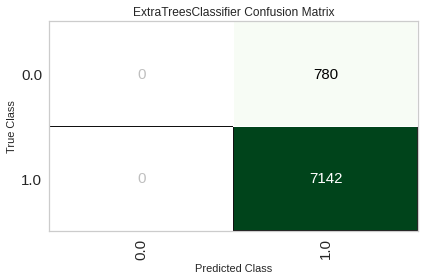

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(tuned_et, 'confusion_matrix')

In [40]:
svm = create_model('svm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.0,1.0000,0.9009,0.9479,0.0000,0.0000
1,0.0991,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9009,0.0,1.0000,0.9009,0.9479,0.0000,0.0000
3,0.9009,0.0,1.0000,0.9009,0.9479,0.0000,0.0000
4,0.1111,0.0,0.0154,0.8800,0.0303,-0.0007,-0.0089
5,0.9009,0.0,1.0000,0.9009,0.9479,0.0000,0.0000
6,0.8368,0.0,0.9205,0.9006,0.9104,-0.0034,-0.0034
7,0.9009,0.0,1.0000,0.9009,0.9479,0.0000,0.0000
8,0.9009,0.0,1.0000,0.9009,0.9479,0.0000,0.0000


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 16
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [41]:
tuned_svm = tune_model(svm, fold=10,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
1,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
2,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
3,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
4,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
5,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
6,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
7,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0
8,0.9009,0.0,1.0,0.9009,0.9479,0.0,0.0


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 17
INFO:logs:SGDClassifier(alpha=0.02, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.4400000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=42, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


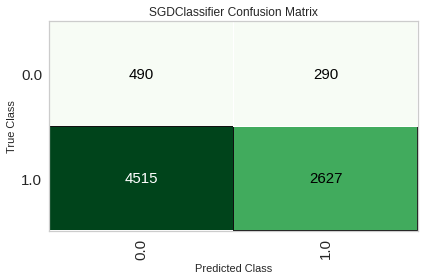

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(tuned_svm, 'confusion_matrix')

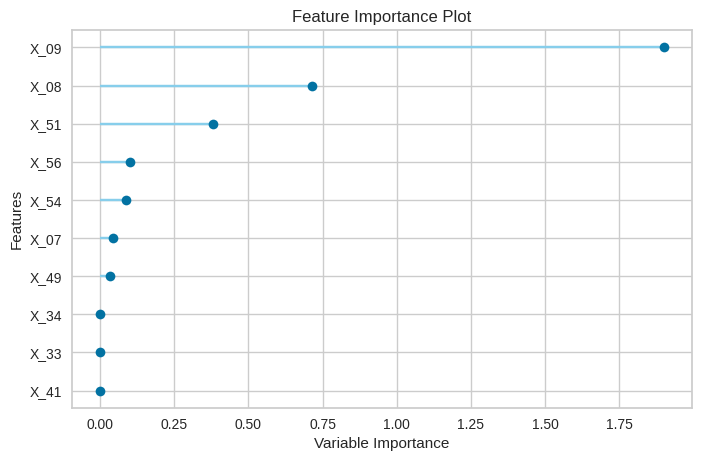

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [43]:
plot_model(tuned_svm,'feature')